<a href="https://colab.research.google.com/github/Bilal903/StockPredicitonUsingMachineLearning_RFC/blob/main/StockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing lib
import numpy as np
import pandas as pd

In [ ]:
#importing pakistan stock exhange data
import yfinance as yf
sp500= yf.Ticker("PSX")
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-04-12 00:00:00-04:00,23.186567,23.856013,22.314891,23.709572,654700,0.0,0.0
2012-04-13 00:00:00-04:00,23.709571,26.115396,23.646810,25.801592,1685000,0.0,0.0
2012-04-16 00:00:00-04:00,25.801593,25.801593,25.097280,25.487789,550200,0.0,0.0
2012-04-17 00:00:00-04:00,25.383181,25.627249,25.104244,25.104244,179600,0.0,0.0
2012-04-18 00:00:00-04:00,25.104244,25.411073,24.058234,25.104244,207100,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-11 00:00:00-04:00,105.800003,107.330002,105.169998,106.459999,2484100,0.0,0.0
2023-04-12 00:00:00-04:00,106.669998,107.470001,105.860001,106.029999,3192500,0.0,0.0
2023-04-13 00:00:00-04:00,105.589996,106.349998,104.739998,106.269997,2765300,0.0,0.0


<Axes: xlabel='Date'>

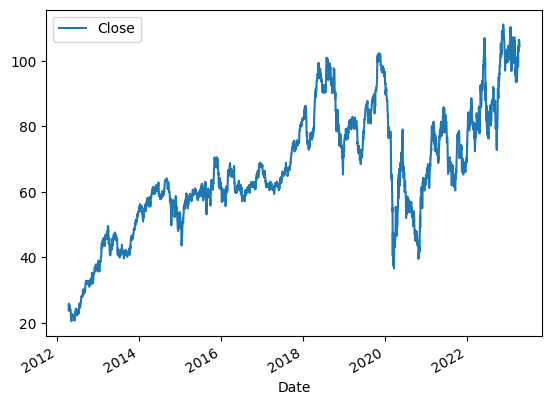

In [ ]:
#plotting the trend on a graph
sp500.plot.line(y="Close", use_index=True)

In [ ]:
#deleting the unused/extra columns from data
del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
#setting to predict if the stock goes up(next days closing sets along with today) 
sp500["Tomorrow"] = sp500["Close"].shift(-1)



In [ ]:
#setting target by checking if next day price is greater than todays price
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2012-04-12 00:00:00-04:00,23.186567,23.856013,22.314891,23.709572,654700,25.801592,1
2012-04-13 00:00:00-04:00,23.709571,26.115396,23.646810,25.801592,1685000,25.487789,0
2012-04-16 00:00:00-04:00,25.801593,25.801593,25.097280,25.487789,550200,25.104244,0
2012-04-17 00:00:00-04:00,25.383181,25.627249,25.104244,25.104244,179600,25.104244,0
2012-04-18 00:00:00-04:00,25.104244,25.411073,24.058234,25.104244,207100,25.104244,0
...,...,...,...,...,...,...,...
2023-04-11 00:00:00-04:00,105.800003,107.330002,105.169998,106.459999,2484100,106.029999,0
2023-04-12 00:00:00-04:00,106.669998,107.470001,105.860001,106.029999,3192500,106.269997,1
2023-04-13 00:00:00-04:00,105.589996,106.349998,104.739998,106.269997,2765300,106.260002,0


In [ ]:
#here we initial number of inividual decison trees(n_estimator)
#setting over fitting to protect build deeply the higher we set the less accurate the model will be 
#random_state means if we re run the model twice the output remains the same as we are working on random number 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
#resticting the model to know the future by selecting only needed column as predictors 
predictors = ["Close", "Volume", "Open", "High", "Low"]
#training the model in order to predict the target
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [ ]:
#to measure the accuracy we use precision score 
#this predicts when we predicted the market goes up and it actually does
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

precision_score(test["Target"],preds)

0.6785714285714286

<Axes: xlabel='Date'>

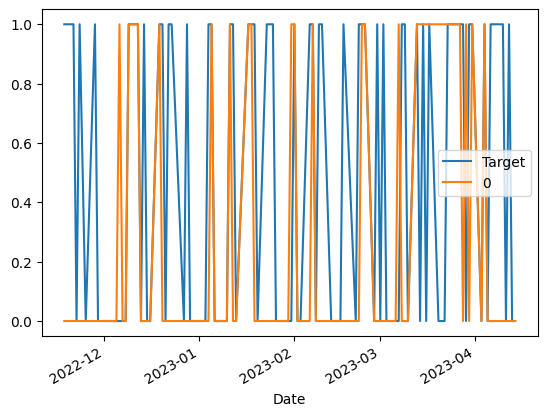

In [ ]:
#combining actual values with our predicted values
#blue= what actually happened
#orange= 0 is our prediction
combined = pd.concat([test["Target"],preds], axis=1)
combined.plot()

In [ ]:
#backtesing
def predict(train, test, predictors, model):
#fitting the model using training predictors
   model.fit(train[predictors], train["Target"])
#generating prediction
   preds= model.predict(test[predictors])
   preds= pd.Series(preds, index=test.index, name="Predictions")
   combined= pd.concat([test["Target"], preds], axis=1)
   return combined

In [ ]:
#start value is the certain amount of data to train your model according to your condition
#here it is given 10 years of data(2500) while steps(250 denotes year)
def backtest(data, model, predictors, start=750, step=250):
  all_predictions= []

#function to loop across year by year and make prediction for all years 
  for i in range(start, data.shape[0], step):
    train= data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)


In [ ]:
#aplying backtesting on our data
predictions = backtest(sp500, model, predictors)
predictions

,Target,Predictions
Date,,
2019-03-28 00:00:00-04:00,0,1
2019-03-29 00:00:00-04:00,0,1
2019-04-01 00:00:00-04:00,0,1
2019-04-02 00:00:00-04:00,1,1
2019-04-03 00:00:00-04:00,1,1
...,...,...
2023-04-10 00:00:00-04:00,1,0
2023-04-11 00:00:00-04:00,0,0
2023-04-12 00:00:00-04:00,1,0


In [ ]:
#counting our prediciton about when we predicted market will go up and it does actually
predictions["Predictions"].value_counts()

1    595
0    425
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5159663865546219

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.510784
0    0.489216
Name: Target, dtype: float64

In [ ]:
horizons = [2, 5, 60, 250]
new_predictors = []

for horizon in horizons:
  rolling_average = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [ ]:
#removes rows with missing values from all columns
sp500 = sp500.dropna()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,Close_Ratio_500,Trend_500
Date,,,,,,,,,,,,,,,,,,,
2017-03-31 00:00:00-04:00,61.819104,62.559455,61.756100,62.394058,2744100,61.661583,0,1.003992,2.0,1.012267,4.0,0.989889,29.0,0.996821,131.0,1.089766,520.0,1.004896,263.0
2017-04-03 00:00:00-04:00,62.291663,62.394056,61.433177,61.661583,1711600,61.771862,1,0.994096,1.0,0.997732,4.0,0.979853,29.0,0.985322,130.0,1.076580,520.0,0.992975,262.0
2017-04-04 00:00:00-04:00,61.826994,61.866377,61.173281,61.771862,1368100,61.094494,0,1.000893,1.0,0.998218,4.0,0.982897,30.0,0.987255,131.0,1.078133,520.0,0.994636,262.0
2017-04-05 00:00:00-04:00,62.015990,62.598822,61.062989,61.094494,2867200,60.551060,0,0.994487,1.0,0.989161,3.0,0.973296,30.0,0.976715,130.0,1.065938,520.0,0.983603,262.0
2017-04-06 00:00:00-04:00,61.110258,61.157519,60.369914,60.551060,3322400,60.763714,1,0.995533,0.0,0.984656,2.0,0.965895,30.0,0.968274,130.0,1.056088,520.0,0.974768,261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-10 00:00:00-04:00,103.010002,105.459999,103.000000,104.959999,2887700,106.459999,1,1.010202,1.0,1.022165,3.0,1.036477,32.0,1.116272,126.0,1.353773,513.0,1.245867,256.0
2023-04-11 00:00:00-04:00,105.800003,107.330002,105.169998,106.459999,2484100,106.029999,0,1.007095,2.0,1.029654,3.0,1.050489,32.0,1.130916,127.0,1.372678,513.0,1.262656,257.0
2023-04-12 00:00:00-04:00,106.669998,107.470001,105.860001,106.029999,3192500,106.269997,1,0.997976,1.0,1.010348,3.0,1.045553,31.0,1.125044,127.0,1.366704,512.0,1.256548,257.0


In [ ]:
#applying RSC for improvement
model = RandomForestClassifier(n_estimators=200, min_samples_split= 50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
#fitting the model using training predictors
   model.fit(train[predictors], train["Target"])
#generating 
   preds= model.predict_proba(test[predictors])[:,1] #this will return the probablity in 0 and 1 that weather the stock will go up tomorrow or not
   preds[preds>= .6] =1 #custom threshold to make model more confident 
   preds[preds<= .6] =0
   preds= pd.Series(preds, index=test.index, name="Predictions")
   combined= pd.concat([test["Target"], preds], axis=1)
   return combined

In [ ]:
predictions = backtest(sp500, model, new_predictors)
predictions

In [ ]:
predictions["Predictions"].value_counts()

0.0    546
1.0    224
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5357142857142857

In [ ]:
predictions

,Target,Predictions
Date,,
2020-03-25 00:00:00-04:00,1,0.0
2020-03-26 00:00:00-04:00,0,0.0
2020-03-27 00:00:00-04:00,1,0.0
2020-03-30 00:00:00-04:00,0,0.0
2020-03-31 00:00:00-04:00,0,0.0
...,...,...
2023-04-10 00:00:00-04:00,1,0.0
2023-04-11 00:00:00-04:00,0,0.0
2023-04-12 00:00:00-04:00,1,0.0
